In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [3]:
df= pd.read_csv("data/train.csv",index_col="Id")
df_test = pd.read_csv("data/test.csv",index_col="Id")

In [3]:
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
Id,,,,,,,,,,,,,,,,,
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [4]:
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
Id,,,,,,,,,,,,,,,,
7500,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
7501,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
7502,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
7503,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
7504,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [8]:
df_test.shape

(2500, 16)

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
Id,,,,,,,,,,,,
0,482087.0,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,99999999.0,47386.0,7914.0,749.0
1,1025487.0,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,264968.0,394972.0,18373.0,737.0
2,751412.0,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,99999999.0,308389.0,13651.0,742.0
3,805068.0,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,121396.0,95855.0,11338.0,694.0
4,776264.0,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,125840.0,93309.0,7180.0,719.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,402192.0,0.0,3.0,8.5,107866.0,0.0,NaN,0.0,129360.0,73492.0,1900.0,697.0
7496,1533984.0,0.0,10.0,26.5,686312.0,0.0,43.0,0.0,444048.0,456399.0,12783.0,7410.0
7497,1878910.0,0.0,12.0,32.1,1778920.0,0.0,NaN,0.0,99999999.0,477812.0,12479.0,748.0


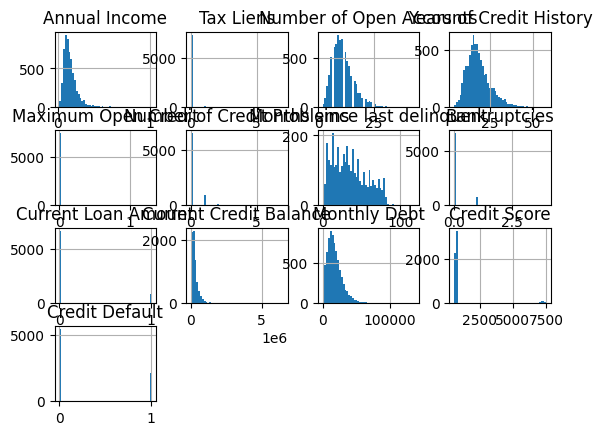

In [29]:
df.hist(bins=50)
plt.show()

In [34]:
len(df.select_dtypes(include='number').columns)

13

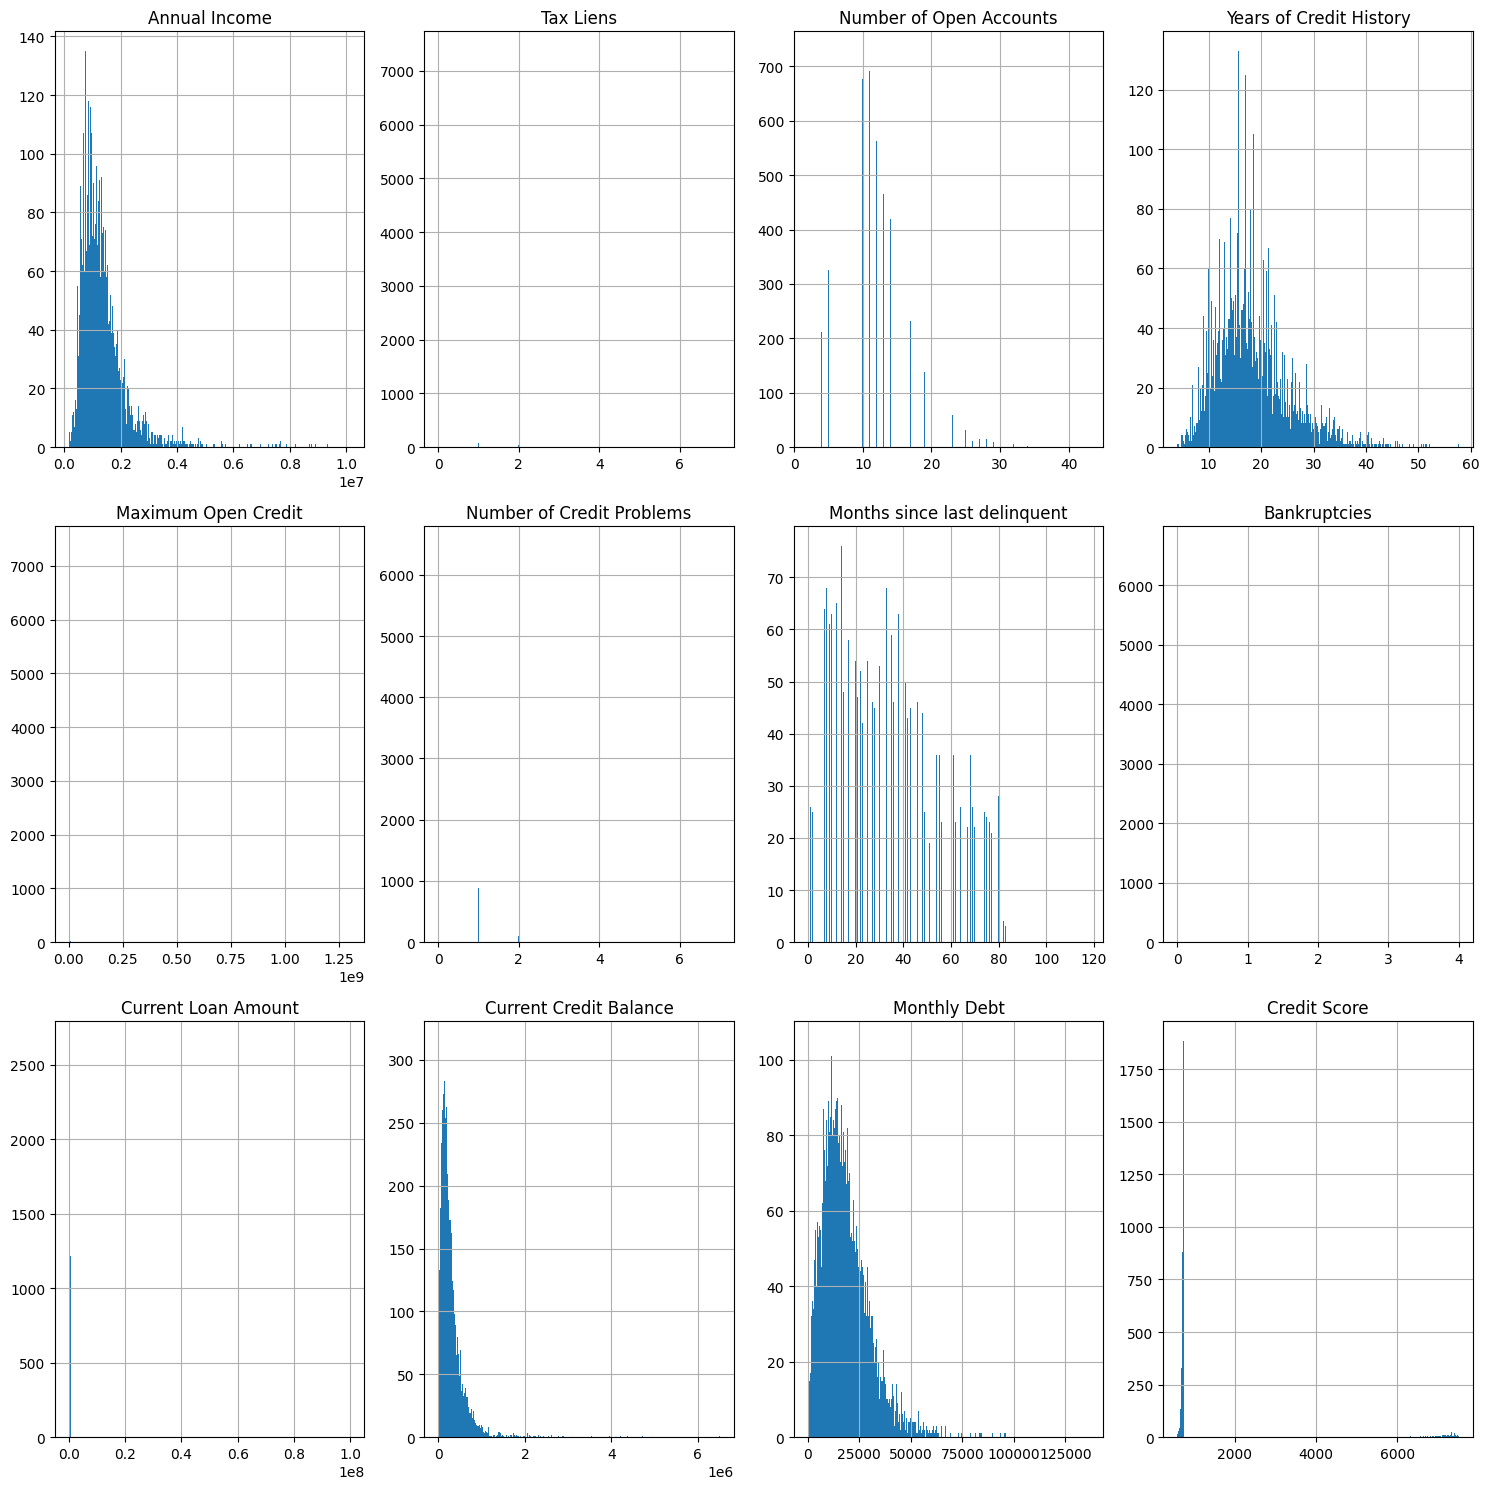

In [38]:
fig , axes = plt.subplots(3,4,figsize=(15,15))
axes = axes.flatten()
columnas = df.select_dtypes(include='float64').columns
for i,c in enumerate(columnas):
    ax=axes[i]
    df[c].hist(bins=500,ax=ax)
    ax.set_title(f"{c}")
plt.tight_layout()
plt.show()

In [40]:
df["Current Loan Amount"].unique()

array([9.9999999e+07, 2.6496800e+05, 1.2139600e+05, ..., 4.4404800e+05,
       6.1527400e+05, 2.6928000e+04], shape=(5386,))

<Axes: ylabel='Current Loan Amount'>

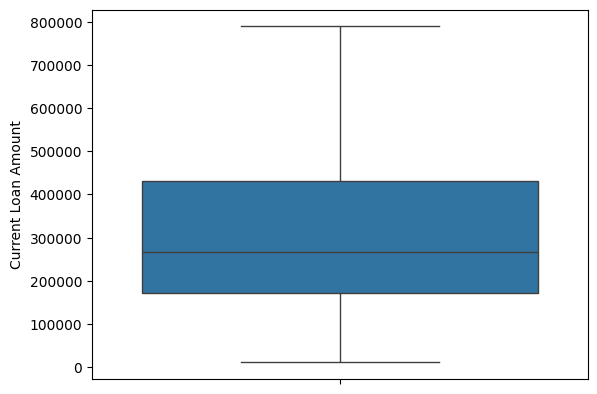

In [5]:
f = df["Current Loan Amount"] < 0.2e8
sns.boxplot(data=df.loc[f,"Current Loan Amount"])

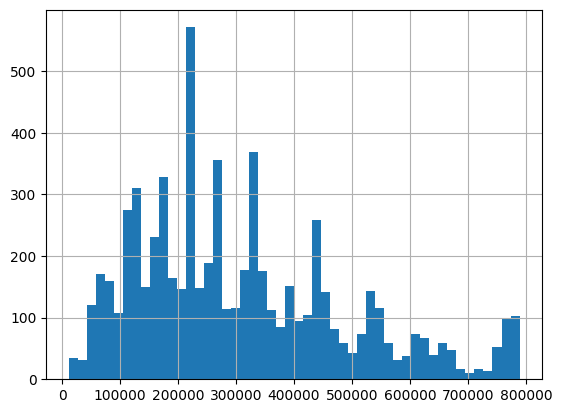

In [10]:
df.loc[f,"Current Loan Amount"].hist(bins=50)
plt.show()

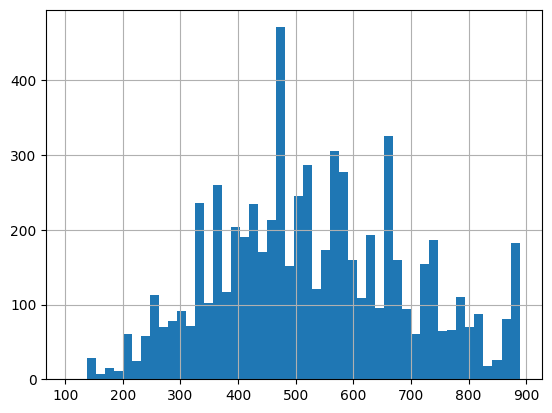

In [8]:
np.sqrt(df.loc[f,"Current Loan Amount"]).hist(bins=50)
plt.show()

In [11]:
df.select_dtypes(include="object")

,Home Ownership,Years in current job,Purpose,Term
Id,,,,
0,Own Home,NaN,debt consolidation,Short Term
1,Own Home,10+ years,debt consolidation,Long Term
2,Home Mortgage,8 years,debt consolidation,Short Term
3,Own Home,6 years,debt consolidation,Short Term
4,Rent,8 years,debt consolidation,Short Term
...,...,...,...,...
7495,Rent,< 1 year,other,Short Term
7496,Home Mortgage,1 year,debt consolidation,Long Term
7497,Rent,6 years,buy a car,Short Term


In [26]:
df["Years in current job"].str.findall(r"[0-9]+").apply(
    lambda x: int(x[0]) if isinstance(x, list) and len(x) > 0 else np.nan
)

Id
0        NaN
1       10.0
2        8.0
3        6.0
4        8.0
        ... 
7495     1.0
7496     1.0
7497     6.0
7498     NaN
7499     4.0
Name: Years in current job, Length: 7500, dtype: float64

In [25]:
df["Years in current job"].str.findall("[0-9]+")

Id
0        NaN
1       [10]
2        [8]
3        [6]
4        [8]
        ... 
7495     [1]
7496     [1]
7497     [6]
7498     NaN
7499     [4]
Name: Years in current job, Length: 7500, dtype: object

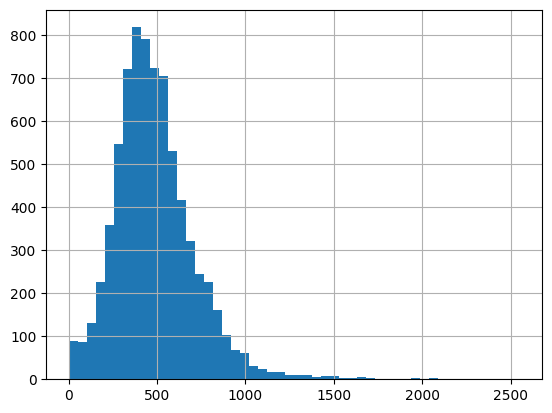

In [64]:
np.sqrt(df["Current Credit Balance"]).hist(bins=50)
plt.show()

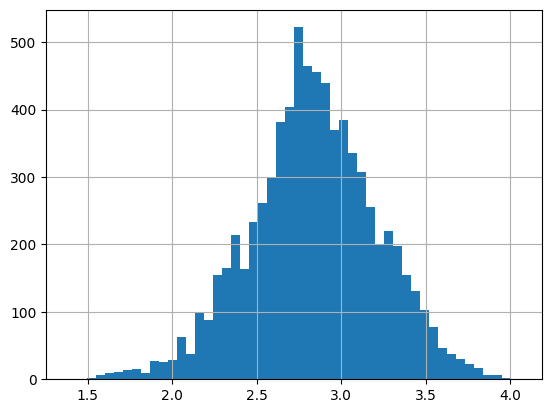

In [62]:
np.log(df["Years of Credit History"]).hist(bins=50)
plt.show()

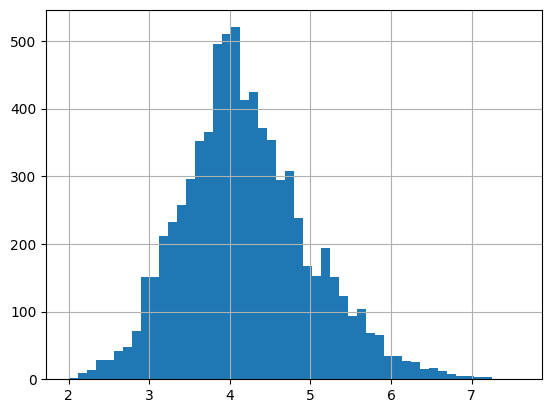

In [58]:
np.sqrt(df["Years of Credit History"]).hist(bins=50)
plt.show()

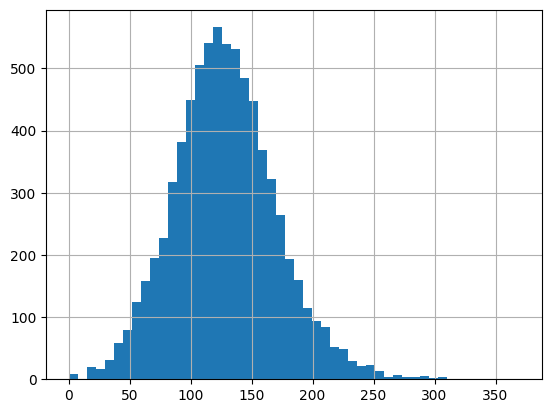

In [55]:
np.sqrt(df["Monthly Debt"]).hist(bins=50)
plt.show()

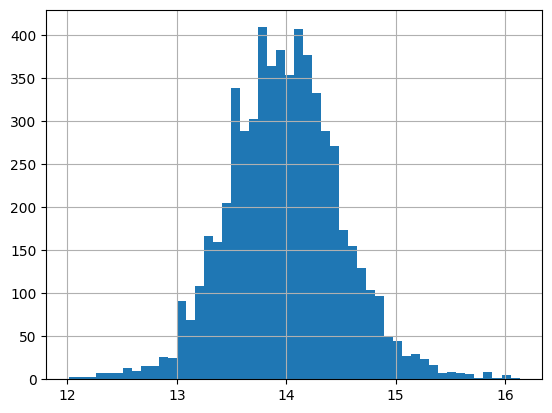

In [32]:
np.log(df["Annual Income"]).hist(bins=50)
plt.show()

In [1]:
df.columns

NameError: name 'df' is not defined

In [14]:
df["Annual Income"].unique()

array([ 482087., 1025487.,  751412., ..., 2833185., 1257610.,  402192.],
      shape=(5479,))

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Current 

In [19]:
df["Credit Score"].unique()

array([ 749.,  737.,  742.,  694.,  719.,   nan,  745.,  705.,  706.,
        728.,  748.,  727.,  644.,  695.,  712.,  697.,  738.,  720.,
        734.,  740.,  708.,  726.,  722.,  750.,  670.,  721.,  729.,
        723.,  716.,  744.,  707.,  739.,  714.,  701.,  735.,  741.,
        747.,  743., 6470.,  725.,  718.,  674.,  746.,  704., 7440.,
        673.,  653., 7010., 7320.,  751.,  711.,  617.,  730.,  724.,
        624.,  736., 7390.,  667.,  679.,  732.,  693.,  668.,  731.,
       7140., 7470.,  661.,  709.,  717.,  678.,  675.,  700.,  645.,
        683., 7370.,  733., 7040.,  703.,  660.,  715.,  654., 7430.,
        662.,  687.,  710.,  664.,  688.,  698.,  702., 6940.,  643.,
        659.,  666., 7170.,  681.,  692., 7300.,  713.,  627., 7500.,
        689., 6790.,  696.,  699.,  672.,  671., 7310.,  651.,  685.,
        639., 7450., 7100.,  669.,  634.,  658.,  665., 7250.,  642.,
        585., 7350., 7220.,  691., 7460., 7060.,  682.,  593.,  686.,
       6110.,  648.,

In [15]:
df.select_dtypes("float64")

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
Id,,,,,,,,,,,,
0,482087.0,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,99999999.0,47386.0,7914.0,749.0
1,1025487.0,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,264968.0,394972.0,18373.0,737.0
2,751412.0,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,99999999.0,308389.0,13651.0,742.0
3,805068.0,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,121396.0,95855.0,11338.0,694.0
4,776264.0,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,125840.0,93309.0,7180.0,719.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,402192.0,0.0,3.0,8.5,107866.0,0.0,NaN,0.0,129360.0,73492.0,1900.0,697.0
7496,1533984.0,0.0,10.0,26.5,686312.0,0.0,43.0,0.0,444048.0,456399.0,12783.0,7410.0
7497,1878910.0,0.0,12.0,32.1,1778920.0,0.0,NaN,0.0,99999999.0,477812.0,12479.0,748.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Current 

In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 7500 to 9999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Curre

In [22]:
df["Years in current job"].unique()

array([nan, '10+ years', '8 years', '6 years', '7 years', '5 years',
       '1 year', '< 1 year', '4 years', '3 years', '2 years', '9 years'],
      dtype=object)

In [23]:
df["Purpose"].unique()

array(['debt consolidation', 'other', 'home improvements', 'take a trip',
       'buy a car', 'small business', 'business loan', 'wedding',
       'educational expenses', 'buy house', 'medical bills', 'moving',
       'major purchase', 'vacation', 'renewable energy'], dtype=object)